# Objective

> MNIST의 데이터 셋을 어떻게 사용할 수 있는지에 대해 간단히 이야기 나누어보자

## 데이터 셋 다운로드
> 아래는 MNIST / FASHIONMNIST / HANDWRITTEN에 관련된 데이터셋을 다운로드 받는 코드입니다. 모든 이미지는 28x28 pixel 크기, 0~255의 픽셀값을 가지고 있으며, train/test/validation으로 모두 나누어 두었습니다.

In [1]:
import os

In [49]:
os.makedirs("../datasets/",exist_ok=True)

# MNIST 다운로드
save_dir = "../datasets/mnist/"
os.makedirs(save_dir,exist_ok=True)
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/mnist/test.csv
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/mnist/train.csv
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/mnist/validation.csv
os.rename("test.csv",save_dir+"test.csv")
os.rename("train.csv",save_dir+"train.csv")
os.rename("validation.csv",save_dir+"validation.csv")
    
# FASHION MNIST 다운로드
save_dir = "../datasets/fashionmnist/"
os.makedirs(save_dir,exist_ok=True)
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/fashionmnist/test.csv
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/fashionmnist/train.csv
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/fashionmnist/validation.csv
os.rename("test.csv",save_dir+"test.csv")
os.rename("train.csv",save_dir+"train.csv")
os.rename("validation.csv",save_dir+"validation.csv")
    
# handwritten 다운로드
save_dir = "../datasets/handwritten/"
os.makedirs(save_dir,exist_ok=True)
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/handwritten/test.csv
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/handwritten/train.csv
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/handwritten/validation.csv
os.rename("test.csv",save_dir+"test.csv")
os.rename("train.csv",save_dir+"train.csv")
os.rename("validation.csv",save_dir+"validation.csv")


--2019-03-09 14:00:20--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/handwritten/test.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.61
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139701882 (133M) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>] 133.23M  5.91MB/s    in 24s     

2019-03-09 14:00:44 (5.47 MB/s) - ‘test.csv’ saved [139701882/139701882]

--2019-03-09 14:00:45--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/all-about-mnist/handwritten/train.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.77
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 488968548 (466M) [text/csv]
Saving to: ‘train

## 데이터 셋 이용하기
> `utils.dataset`에는 크게 태스크 별로, Classification, SerializationDataset, CalculationDatset, LocalizationDataset으로 나뉘어집니다. 태스크 별로 적합한 형태의 데이터가 나오게 됩니다.

In [2]:
import sys
sys.path.append("../")
from utils.dataset import (
    ClassificationDataset,
    SerializationDataset,
    CalculationDataset,
    LocalizationDataset
)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## 1. ClassificationDataset

> 가장 기본 형태의 Classification입니다.

In [4]:
test_set = ClassificationDataset(dataset='mnist', data_type="test")

모든 데이터셋에서 공통으로 들어가는 3개의 메소드는 아래와 같습니다.

## 1)  __getitem__

* 단일 데이터 가져오기

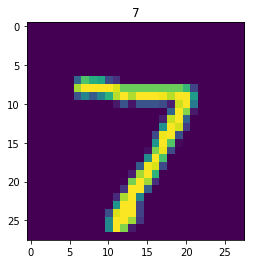

In [5]:
image, label = test_set[0]

plt.title(label)
plt.imshow(image)
plt.show()

> 하나의 int로 지정하면 단일 데이터가 나옵니다.

* 복수개의 데이터 가져오기

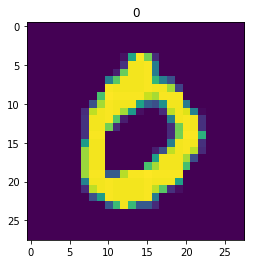

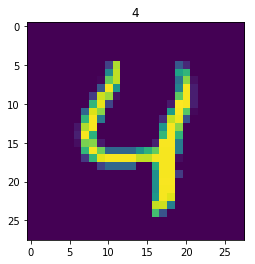

In [7]:
images, labels = test_set[3:5]

for i in range(2):
    plt.title(labels[i])
    plt.imshow(images[i])
    plt.show()

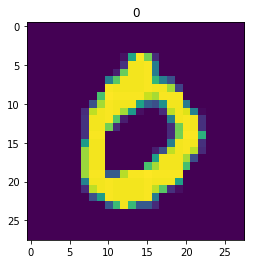

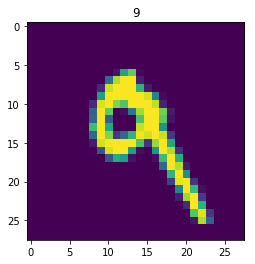

In [8]:
images, labels = test_set[[3,7]]

for i in range(2):
    plt.title(labels[i])
    plt.imshow(images[i])
    plt.show()

> numpy 인덱싱 방식과 동일합니다.

## 2)  __len__

In [9]:
len(test_set) # test 데이터 수 

10000

In [15]:
valid_set = ClassificationDataset(dataset='mnist', data_type="validation")
len(valid_set) # validation 데이터 수

5000

In [14]:
train_set = ClassificationDataset(dataset='mnist', data_type="train")
len(train_set) # train 데이터 수

55000

> 위와 같은 방식으로 현재 데이터 셋의 크기를 알 수 있습니다.

## 3) shuffle

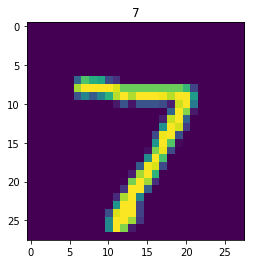

In [17]:
image, label = test_set[0]

plt.title(label)
plt.imshow(image)
plt.show()

In [18]:
test_set.shuffle()

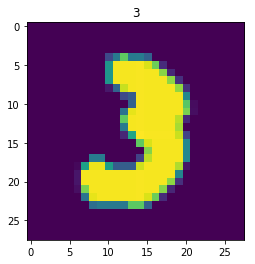

In [19]:
image, label = test_set[0]

plt.title(label)
plt.imshow(image)
plt.show()

> shuffling을 하면 데이터의 순서를 random shuffling할 수 있습니다.

데이터 셋으로는 크게 3가지

* mnist
* fashionmnist
* handwritten

이 있습니다.

### fashionmnist

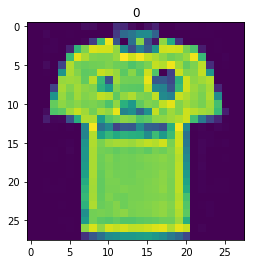

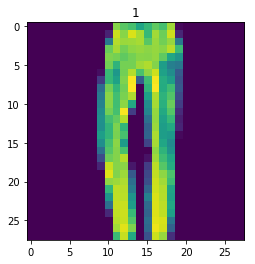

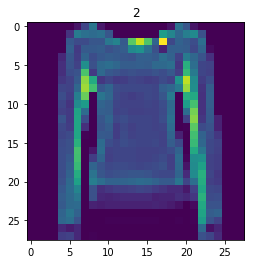

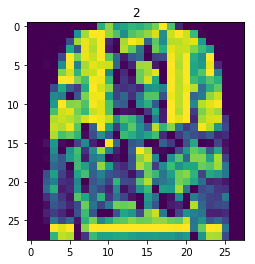

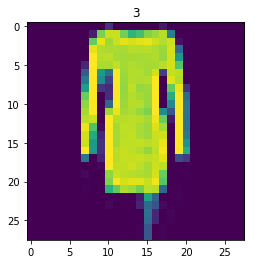

In [47]:
test_set = ClassificationDataset(dataset='fashionmnist', data_type="test")

images, labels = test_set[0:5]
for i in range(len(images)):
    plt.title(labels[i])
    plt.imshow(images[i])
    plt.show()

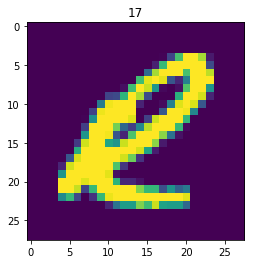

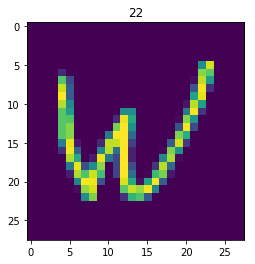

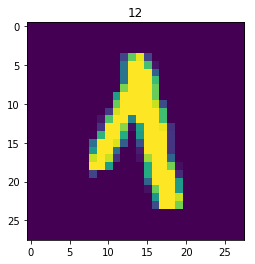

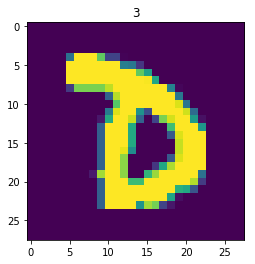

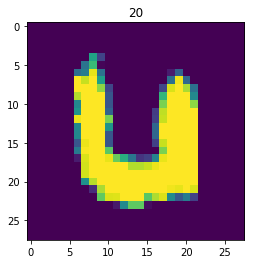

In [50]:
test_set = ClassificationDataset(dataset='handwritten', data_type="test")

images, labels = test_set[0:5]
for i in range(len(images)):
    plt.title(labels[i])
    plt.imshow(images[i])
    plt.show()

## 2. SerializationDataset

> 직렬로 숫자를 나열한 이미지를 만드는 데이터 셋입니다.

In [20]:
test_set = SerializationDataset(dataset='mnist', 
                                data_type="test",
                                digit=5)

SerializationDataset은 아래와 같은 return값이 주어집니다.

* image : 직렬화된 숫자 이미지
* label : 위와 매칭된 직렬화된 숫자값 
* max_len : 실제로 이미지에서 이미지 정보가 있는 값

In [25]:
image, label, max_len = test_set[0]

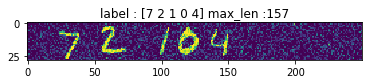

In [29]:
plt.title("label : {} max_len :{}".format(label, max_len))
plt.imshow(image)
plt.show()

> 위와 같이 형태가 나온다.

### digit의 값으로 몇개의 숫자를 직렬화 할것인지 결정할 수 있다.

In [30]:
test_set = SerializationDataset(dataset='mnist', 
                                data_type="test",
                                digit=7)

In [31]:
image, label, max_len = test_set[0]

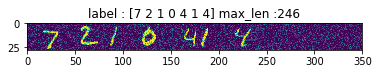

In [32]:
plt.title("label : {} max_len :{}".format(label, max_len))
plt.imshow(image)
plt.show()

> 이렇게 복수개의 값을 가져올 수 있다.

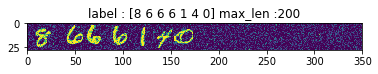

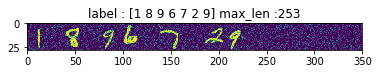

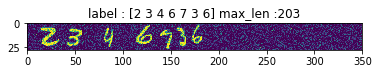

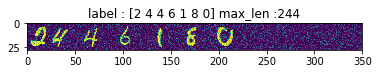

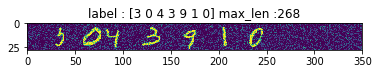

In [36]:
test_set.shuffle()
images, labels, max_lens = test_set[0:5]

for i in range(len(labels)):
    plt.title("label : {} max_len :{}".format(labels[i], max_lens[i]))
    plt.imshow(images[i])
    plt.show()

## 3. CalculationDataset

> 직렬로 수식을 랜덤으로 만드는 데이터 셋입니다.

In [43]:
# CalculationDatset은 당연히 mnist, 즉 숫자데이터만으로 만들수 있어서, 
# dataset은 mnist로 고정입니다.
test_set = CalculationDataset(data_type="test", digit=5)

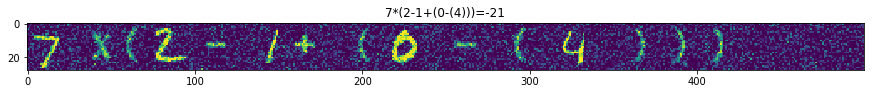

In [44]:
image, eq_result, max_len, equation = test_set[0]

plt.figure(figsize=(15,3))
plt.title(equation+"={}".format(eq_result))
plt.imshow(image)
plt.show()